In [ ]:
# importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

ModuleNotFoundError: No module named 'google'

In [ ]:
# Reading the input
data = pd.read_csv('/content/gdrive/MyDrive/Sample-data/pubg.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### EDA

In [ ]:
data.shape

(4446966, 29)

In [ ]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [ ]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
# checking for duplicates
data[data.duplicated()]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [ ]:
# Dropping the null Values
data.dropna(inplace=True)

In [ ]:
data.shape

(4446965, 29)

In [ ]:
# Correlation
data.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007645,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555290,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,-0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,-0.386032,-0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555290,-0.469829,-0.386032,1.000000,-0.023278,-0.730499,-0.810517,...,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490144,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023278,1.000000,0.036192,0.037091,...,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730499,0.036192,1.000000,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810517,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


In [ ]:
# Correlation with the Win Place Predection
data.corrwith(data.winPlacePerc)

assists            0.299441
boosts             0.634234
damageDealt        0.440507
DBNOs              0.279970
headshotKills      0.277722
heals              0.427857
killPlace         -0.719069
killPoints         0.012908
kills              0.419916
killStreaks        0.377566
longestKill        0.410154
matchDuration     -0.005171
maxPlace           0.037377
numGroups          0.039621
rankPoints         0.013523
revives            0.240881
rideDistance       0.342915
roadKills          0.034544
swimDistance       0.149607
teamKills          0.015943
vehicleDestroys    0.073436
walkDistance       0.810888
weaponsAcquired    0.583806
winPoints          0.007061
winPlacePerc       1.000000
dtype: float64

In [ ]:
for j in ['matchType']:
    print(f'unique[{j}] count:',data[j].describe())
#data.matchType

unique[matchType] count: count       4446965
unique           16
top       squad-fpp
freq        1756186
Name: matchType, dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446965 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
data.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.0000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.0000,33.0
damageDealt,130.717167,170.780629,0.0,0.0,84.2400,186.0000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.0000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.0000,64.0
heals,1.370148,2.679982,0.0,0.0,0.0000,2.0000,80.0
killPlace,47.599361,27.462931,1.0,24.0,47.0000,71.0000,101.0
killPoints,505.006156,627.504921,0.0,0.0,0.0000,1172.0000,2170.0
kills,0.924784,1.558445,0.0,0.0,0.0000,1.0000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.0000,20.0


In [ ]:
# To view the unique count of ID's
for m in ['Id', 'groupId', 'matchId']:
    print(f'unique[{m}] count: ',data[m].nunique())

unique[Id] count:  4446965
unique[groupId] count:  2026744
unique[matchId] count:  47964


<AxesSubplot:>

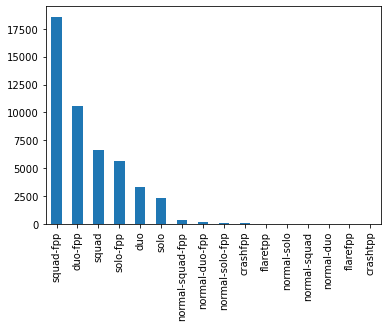

In [ ]:
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

#### Three cateories classified as follows
- solo  <-- solo,solo-fpp,normal-solo,normal-solo-fpp
- duo   <-- duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
- squad <-- squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp

<AxesSubplot:>

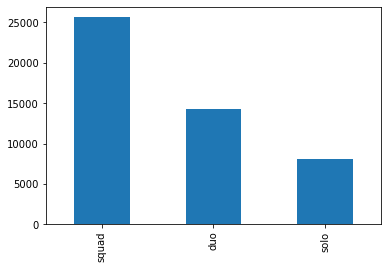

In [ ]:
m = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
data['matchType'] = data['matchType'].apply(m)
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

<AxesSubplot:>

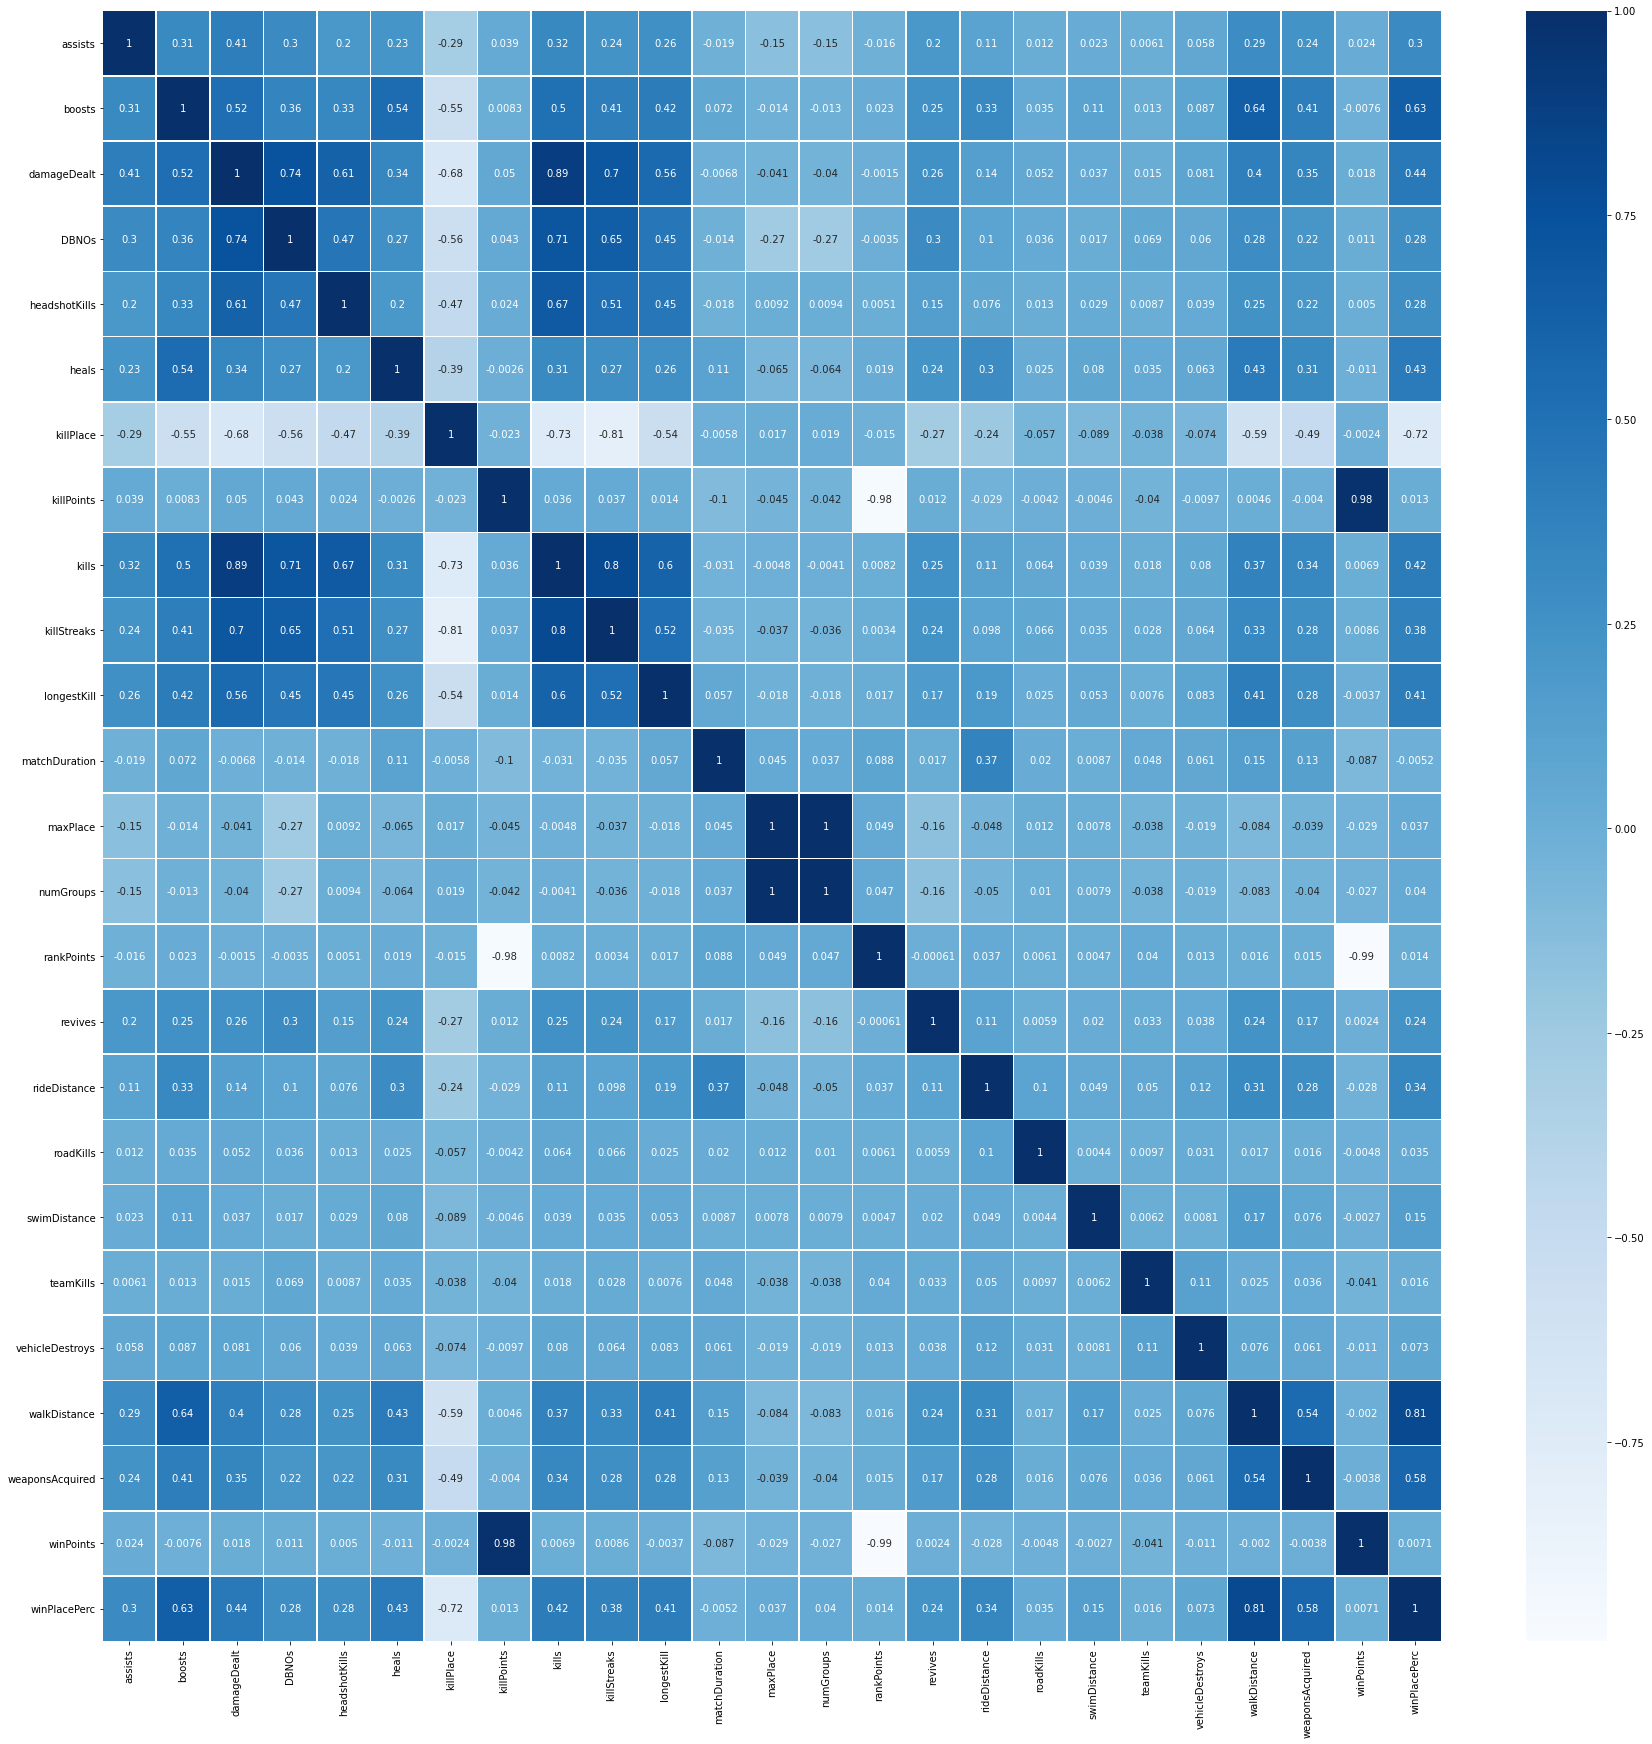

In [ ]:
plt.figure(figsize=(30,30))
sb.heatmap(data.corr(),annot=True,cmap='Blues',linewidths=.6)

In [ ]:
# Create correlation matrix
corr_matrix = data.corr().abs()
corr_matrix

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,0.007645,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,0.555290,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,0.386032,0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,0.010990,0.427857
killPlace,0.290062,0.554844,0.677398,0.555290,0.469829,0.386032,1.000000,0.023278,0.730499,0.810517,...,0.269804,0.236202,0.057356,0.089396,0.037797,0.073569,0.590236,0.490144,0.002415,0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,0.002585,0.023278,1.000000,0.036192,0.037091,...,0.012041,0.029316,0.004156,0.004604,0.039739,0.009658,0.004630,0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,0.730499,0.036192,1.000000,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,0.810517,0.037091,0.802500,1.000000,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

<ipython-input-20-765c5967d629>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,NaN,0.307683,0.406726,0.301057,0.198289,0.228556,0.290062,0.039066,0.319690,0.243471,...,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,NaN,NaN,0.521947,0.358907,0.334661,0.535854,0.554844,0.008347,0.502024,0.405327,...,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,0.007645,0.634234
damageDealt,NaN,NaN,NaN,0.735763,0.613409,0.342987,0.677398,0.049904,0.888783,0.703599,...,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,NaN,NaN,NaN,NaN,0.469923,0.265485,0.555290,0.042616,0.707848,0.646872,...,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,NaN,NaN,NaN,NaN,NaN,0.199917,0.469829,0.023988,0.674275,0.512882,...,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,NaN,NaN,NaN,NaN,NaN,NaN,0.386032,0.002585,0.311781,0.270412,...,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,0.010990,0.427857
killPlace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023278,0.730499,0.810517,...,0.269804,0.236202,0.057356,0.089396,0.037797,0.073569,0.590236,0.490144,0.002415,0.719069
killPoints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.036192,0.037091,...,0.012041,0.029316,0.004156,0.004604,0.039739,0.009658,0.004630,0.003978,0.983417,0.012908
kills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.802500,...,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


In [ ]:
# Find features with correlation greater than 0.50
higher_corr = [column for column in upper.columns if any(upper[column] > 0.75)]
higher_corr

['kills',
 'killStreaks',
 'numGroups',
 'rankPoints',
 'winPoints',
 'winPlacePerc']

In [ ]:
df = data[data['matchType']=='solo']
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,...,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,...,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,...,0,0.0,0,0.00,0,0,270.70,1,0,0.3474


In [ ]:
df.shape

(720712, 29)

In [ ]:
df1 = data[data['matchType']=='solo-fpp']
print(df1.shape)
df1.head()


(0, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [ ]:
df2 = data[data['matchType']=='normal-solo-fpp']
print(df2.shape)
df2.head()

(0, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [ ]:
df3 = data[data['matchType']=='normal-solo']
print(df3.shape)
df3.head()

(0, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


In [ ]:
solo = pd.concat([df,df1,df2,df3],axis=0)
print(solo.shape)
solo.head()

(720712, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0,0,0.00,0,0,49.75,2,0,0.1875
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0,0,0.00,0,0,1089.00,6,1500,0.7368
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,...,0,1228.0,0,76.84,0,0,2050.00,6,1462,0.8750
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,...,0,2367.0,0,15.29,0,0,1787.00,3,0,0.8211
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,...,0,0.0,0,0.00,0,0,270.70,1,0,0.3474


In [ ]:
for m in ['Id', 'groupId', 'matchId']:
    print(f'unique[{m}] count: ',solo[m].nunique())

unique[Id] count:  720712
unique[groupId] count:  693493
unique[matchId] count:  8094


In [ ]:
solo.corrwith(solo.winPlacePerc)

assists            0.120039
boosts             0.637369
damageDealt        0.481302
DBNOs                   NaN
headshotKills      0.337827
heals              0.401358
killPlace         -0.757971
killPoints         0.023767
kills              0.475520
killStreaks        0.447713
longestKill        0.438195
matchDuration     -0.010163
maxPlace           0.093724
numGroups          0.100875
rankPoints         0.003315
revives                 NaN
rideDistance       0.318398
roadKills          0.050082
swimDistance       0.165086
teamKills          0.024449
vehicleDestroys    0.060818
walkDistance       0.810892
weaponsAcquired    0.596826
winPoints          0.019797
winPlacePerc       1.000000
dtype: float64

In [ ]:
d1 = data[data['matchType']=='duo']
print('duo : ',d1.shape)
d2 = data[data['matchType']=='duo-fpp']
print('duo-fpp : ',d2.shape)
d3 = data[data['matchType']=='normal-duo']
print('normal-duo : ',d3.shape)
d4 = data[data['matchType']=='normal-duo-fpp']
print('normal-duo-fpp : ',d4.shape)
d5 = data[data['matchType']=='crashfpp']
print('crashfpp : ',d5.shape)
d6 = data[data['matchType']=='crashtpp']
print('crashtpp : ',d6.shape)
duo = pd.concat([d1,d2,d3,d4,d5,d6],axis=0)
print('total duo : ',duo.shape)
duo.head()

duo :  (1322628, 29)
duo-fpp :  (0, 29)
normal-duo :  (0, 29)
normal-duo-fpp :  (0, 29)
crashfpp :  (0, 29)
crashtpp :  (0, 29)
total duo :  (1322628, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0,0,0.0,0,0,161.8,2,0,0.7755
11,8de328a74658a9,f643df9df3877c,80170383d90003,0,0,137.90,1,0,0,64,...,0,0.0,0,0.0,0,0,451.7,1,0,0.4043
15,12d8d4bd94312c,fe52d481bae68b,6fd9e765ddd0c5,0,0,80.71,1,0,0,72,...,1,0.0,0,0.0,0,0,105.1,5,0,0.2766
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.10,0,1,8,18,...,1,2734.0,0,0.0,0,0,1794.0,5,0,0.6383
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.30,1,2,3,15,...,0,2332.0,0,0.0,0,0,1264.0,4,1494,0.7500


In [ ]:
duo.corrwith(duo.winPlacePerc)

assists            0.320169
boosts             0.647790
damageDealt        0.471523
DBNOs              0.356358
headshotKills      0.297502
heals              0.446659
killPlace         -0.744370
killPoints         0.014359
kills              0.446807
killStreaks        0.405922
longestKill        0.423718
matchDuration     -0.000067
maxPlace          -0.002485
numGroups          0.010301
rankPoints         0.007348
revives            0.263870
rideDistance       0.368065
roadKills          0.038772
swimDistance       0.152956
teamKills          0.025659
vehicleDestroys    0.073709
walkDistance       0.827704
weaponsAcquired    0.631161
winPoints          0.008943
winPlacePerc       1.000000
dtype: float64

In [ ]:
for m in ['Id', 'groupId', 'matchId']:
    print(f'unique[{m}] count: ',duo[m].nunique())

unique[Id] count:  1322628
unique[groupId] count:  645041
unique[matchId] count:  14224


In [ ]:
s1 = data[data['matchType']=='squad']
print('squad : ',s1.shape)
s2 = data[data['matchType']=='squad-fpp']
print('squad-fpp : ',s2.shape)
s3 = data[data['matchType']=='normal-squad']
print('normal-squad : ',s3.shape)
s4 = data[data['matchType']=='normal-squad-fpp']
print('normal-squad-fpp : ',s4.shape)
s5 = data[data['matchType']=='flarefpp']
print('flarefpp : ',s5.shape)
s6 = data[data['matchType']=='flaretpp']
print('flaretpp : ',s6.shape)
sqd = pd.concat([s1,s2,s3,s4,s5,s6],axis=0)
print('total sqd : ',sqd.shape)
sqd.head()

squad :  (2403625, 29)
squad-fpp :  (0, 29)
normal-squad :  (0, 29)
normal-squad-fpp :  (0, 29)
flarefpp :  (0, 29)
flaretpp :  (0, 29)
total sqd :  (2403625, 29)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.5,1,1497,0.0000


In [ ]:
for m in ['Id', 'groupId', 'matchId']:
    print(f'unique[{m}] count: ',sqd[m].nunique())

unique[Id] count:  2403625
unique[groupId] count:  688210
unique[matchId] count:  25646


In [ ]:
sqd.corrwith(sqd.winPlacePerc)

assists            0.336333
boosts             0.629018
damageDealt        0.415684
DBNOs              0.317433
headshotKills      0.249042
heals              0.431329
killPlace         -0.695515
killPoints         0.013580
kills              0.390137
killStreaks        0.351840
longestKill        0.398809
matchDuration     -0.010487
maxPlace           0.000550
numGroups          0.010482
rankPoints         0.015702
revives            0.275053
rideDistance       0.339904
roadKills          0.025326
swimDistance       0.143380
teamKills          0.013017
vehicleDestroys    0.077630
walkDistance       0.815314
weaponsAcquired    0.559330
winPoints          0.005198
winPlacePerc       1.000000
dtype: float64

In [ ]:
# applying model only on solo dataset
X = solo.loc[ : ,['assists', 'boosts', 'damageDealt',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']]
y =   solo.loc[ : ,['winPlacePerc']]

In [ ]:
print(X.shape)
print(y.shape)

(720712, 22)
(720712, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
r2_score(y_test,y_pre)

0.8806993514707789

In [ ]:

mean_absolute_error(y_test,y_pre)


0.07955870089549648

In [ ]:
mean_squared_error(y_test,y_pre)

0.010610465995752383

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model.fit(X_train,y_train)
y_pr = model.predict(X_test)

In [ ]:
r2_score(y_test,y_pr)

0.8806993514707789

In [ ]:
print(mean_absolute_error(y_test,y_pr))
print(mean_squared_error(y_test,y_pr))

0.07316470940138717
0.010610465995752383


##### regg and random forest for duo

In [ ]:
duo.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0,0,0.0,0,0,161.8,2,0,0.7755
11,8de328a74658a9,f643df9df3877c,80170383d90003,0,0,137.90,1,0,0,64,...,0,0.0,0,0.0,0,0,451.7,1,0,0.4043
15,12d8d4bd94312c,fe52d481bae68b,6fd9e765ddd0c5,0,0,80.71,1,0,0,72,...,1,0.0,0,0.0,0,0,105.1,5,0,0.2766
20,02ace8c6e58461,a4bc548028f800,80f2b8448e474b,0,4,269.10,0,1,8,18,...,1,2734.0,0,0.0,0,0,1794.0,5,0,0.6383
22,9b2961d4d51f91,799d0a4d61dc3c,e833ca2282169d,0,1,192.30,1,2,3,15,...,0,2332.0,0,0.0,0,0,1264.0,4,1494,0.7500


In [ ]:
duo.shape

(1322628, 29)

In [ ]:
corr = duo.corr().abs()
corr

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.343519,0.412217,0.254209,0.203253,0.234745,0.298563,0.033414,0.311445,0.225664,...,0.148827,0.114172,0.015531,0.030304,0.007253,0.052788,0.296803,0.233665,0.020026,0.320169
boosts,0.343519,1.000000,0.560277,0.437728,0.361893,0.552519,0.571147,0.006740,0.540644,0.435856,...,0.278709,0.335569,0.030434,0.111022,0.013832,0.084398,0.648264,0.432711,0.009315,0.647790
damageDealt,0.412217,0.560277,1.000000,0.813693,0.609438,0.371162,0.693789,0.047083,0.892043,0.717478,...,0.306198,0.150614,0.048496,0.042583,0.014152,0.085815,0.431519,0.352274,0.014970,0.471523
DBNOs,0.254209,0.437728,0.813693,1.000000,0.535058,0.295817,0.621592,0.028323,0.793969,0.675384,...,0.301560,0.114180,0.048345,0.028103,0.050570,0.062948,0.322663,0.262639,0.000077,0.356358
headshotKills,0.203253,0.361893,0.609438,0.535058,1.000000,0.222588,0.480315,0.024530,0.666097,0.519682,...,0.195044,0.086266,0.005683,0.032111,0.011422,0.042272,0.280883,0.217906,0.004809,0.297502
heals,0.234745,0.552519,0.371162,0.295817,0.222588,1.000000,0.404350,0.003444,0.338027,0.291974,...,0.243961,0.297991,0.020364,0.081379,0.033130,0.058481,0.430122,0.323803,0.012321,0.446659
killPlace,0.298563,0.571147,0.693789,0.621592,0.480315,0.404350,1.000000,0.025695,0.747022,0.830650,...,0.304482,0.253851,0.060656,0.094164,0.050646,0.075371,0.612685,0.518100,0.006476,0.744370
killPoints,0.033414,0.006740,0.047083,0.028323,0.024530,0.003444,0.025695,1.000000,0.035268,0.032626,...,0.004643,0.029601,0.013599,0.002521,0.040887,0.012224,0.001159,0.002478,0.985394,0.014359
kills,0.311445,0.540644,0.892043,0.793969,0.666097,0.338027,0.747022,0.035268,1.000000,0.815131,...,0.312391,0.129033,0.065891,0.044729,0.022726,0.086905,0.411575,0.331718,0.005217,0.446807
killStreaks,0.225664,0.435856,0.717478,0.675384,0.519682,0.291974,0.830650,0.032626,0.815131,1.000000,...,0.275747,0.109873,0.065367,0.040559,0.037802,0.066464,0.353236,0.292769,0.005051,0.405922


In [ ]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper

<ipython-input-53-4bfaccc9fe8b>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,NaN,0.343519,0.412217,0.254209,0.203253,0.234745,0.298563,0.033414,0.311445,0.225664,...,0.148827,0.114172,0.015531,0.030304,0.007253,0.052788,0.296803,0.233665,0.020026,0.320169
boosts,NaN,NaN,0.560277,0.437728,0.361893,0.552519,0.571147,0.006740,0.540644,0.435856,...,0.278709,0.335569,0.030434,0.111022,0.013832,0.084398,0.648264,0.432711,0.009315,0.647790
damageDealt,NaN,NaN,NaN,0.813693,0.609438,0.371162,0.693789,0.047083,0.892043,0.717478,...,0.306198,0.150614,0.048496,0.042583,0.014152,0.085815,0.431519,0.352274,0.014970,0.471523
DBNOs,NaN,NaN,NaN,NaN,0.535058,0.295817,0.621592,0.028323,0.793969,0.675384,...,0.301560,0.114180,0.048345,0.028103,0.050570,0.062948,0.322663,0.262639,0.000077,0.356358
headshotKills,NaN,NaN,NaN,NaN,NaN,0.222588,0.480315,0.024530,0.666097,0.519682,...,0.195044,0.086266,0.005683,0.032111,0.011422,0.042272,0.280883,0.217906,0.004809,0.297502
heals,NaN,NaN,NaN,NaN,NaN,NaN,0.404350,0.003444,0.338027,0.291974,...,0.243961,0.297991,0.020364,0.081379,0.033130,0.058481,0.430122,0.323803,0.012321,0.446659
killPlace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025695,0.747022,0.830650,...,0.304482,0.253851,0.060656,0.094164,0.050646,0.075371,0.612685,0.518100,0.006476,0.744370
killPoints,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035268,0.032626,...,0.004643,0.029601,0.013599,0.002521,0.040887,0.012224,0.001159,0.002478,0.985394,0.014359
kills,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.815131,...,0.312391,0.129033,0.065891,0.044729,0.022726,0.086905,0.411575,0.331718,0.005217,0.446807
killStreaks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.275747,0.109873,0.065367,0.040559,0.037802,0.066464,0.353236,0.292769,0.005051,0.405922


In [ ]:
# high corr features 
higher_corr = [column for column in corr.columns if any(duo[column] > 0.75)]
higher_corr

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

In [ ]:
# applying model only on duo dataset
X = duo.loc[ : ,['assists', 'boosts', 'damageDealt','DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'revives','rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']]
y =   duo.loc[ : ,['winPlacePerc']]

In [ ]:
print(X.shape)
print(y.shape)

(1322628, 24)
(1322628, 1)


### linear regg

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=15)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pre))
print(mean_absolute_error(y_test,y_pre))
print(mean_squared_error(y_test,y_pre))

0.8700170188824372
0.07936999536589384
0.011801670918086189


### random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model.fit(X_train,y_train)
y_pr = model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pr))
print(mean_absolute_error(y_test,y_pr))
print(mean_squared_error(y_test,y_pr))

0.8700170188824372
0.07936999536589384
0.011801670918086189


#### linear regg and random forest for sqaud 

In [ ]:
sqd.shape

(2403625, 29)

In [ ]:
corr1 = sqd.corr().abs()
upper1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))


<ipython-input-93-0937cecdd63b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))


In [ ]:
higher_corr_sqd = [column for column in corr1.columns if any(sqd[column] > 0.75)]
higher_corr_sqd

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

In [ ]:
# applying model only on squad dataset
X = sqd.loc[ : ,['assists', 'boosts', 'damageDealt','DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints','revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']]
y =   sqd.loc[ : ,['winPlacePerc']]

In [ ]:
print(X.shape)
print(y.shape)

(2403625, 24)
(2403625, 1)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=15)

#### Linear regression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pre))
print(mean_absolute_error(y_test,y_pre))
print(mean_squared_error(y_test,y_pre))

0.8164756700234928
0.0985935628285298
0.01791624100968103


#### Random forest 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model.fit(X_train,y_train)
y_pr = model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pr))
print(mean_absolute_error(y_test,y_pr))
print(mean_squared_error(y_test,y_pr))

0.8164756700234928
0.0985935628285298
0.01791624100968103


In [ ]:
# not needed we can do it on data also 
match = pd.concat([solo,duo,sqd])
match

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,...,0,0.0,0,0.000,0,0,49.75,2,0,0.1875
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,...,0,2004.0,0,0.000,0,0,1089.00,6,1500,0.7368
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,...,0,1228.0,0,76.840,0,0,2050.00,6,1462,0.8750
17,92022479b92ce7,2f2c33f548c4b9,07948d723b9c0f,0,3,254.300,0,0,12,13,...,0,2367.0,0,15.290,0,0,1787.00,3,0,0.8211
35,47143f942503e0,e17a8867a393ec,bc2faecb77e5ec,0,0,136.900,0,0,0,37,...,0,0.0,0,0.000,0,0,270.70,1,0,0.3474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.900,0,0,1,77,...,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.700,3,2,0,4,...,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000,0,0,0,74,...,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060,0,0,0,66,...,0,0.0,0,2.184,0,0,788.70,4,0,0.4815


In [ ]:
corr_all = match.corr().abs()
upper_all = corr_all.where(np.triu(np.ones(corr_all.shape), k=1).astype(np.bool))


<ipython-input-125-fde8172e5e3a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_all = corr_all.where(np.triu(np.ones(corr_all.shape), k=1).astype(np.bool))


In [ ]:
higher_corr_all = [column for column in corr1.columns if any(sqd[column] > 0.75)]
higher_corr_all

['assists',
 'boosts',
 'damageDealt',
 'DBNOs',
 'headshotKills',
 'heals',
 'killPlace',
 'killPoints',
 'kills',
 'killStreaks',
 'longestKill',
 'matchDuration',
 'maxPlace',
 'numGroups',
 'rankPoints',
 'revives',
 'rideDistance',
 'roadKills',
 'swimDistance',
 'teamKills',
 'vehicleDestroys',
 'walkDistance',
 'weaponsAcquired',
 'winPoints',
 'winPlacePerc']

In [ ]:
# applying model on whole dataset
X = match.loc[ : ,['assists', 'boosts', 'damageDealt','DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints','revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints']]
y =   match.loc[ : ,['winPlacePerc']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=20)

### linear regg on the whole data set

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pre = model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pre))
print(mean_absolute_error(y_test,y_pre))
print(mean_squared_error(y_test,y_pre))

0.8301631171629603
0.0927011730842339
0.0160522027855193


### Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model.fit(X_train,y_train)
y_pr = model.predict(X_test)

In [ ]:
print(r2_score(y_test,y_pr))
print(mean_absolute_error(y_test,y_pr))
print(mean_squared_error(y_test,y_pr))

0.8301631171629603
0.0927011730842339
0.0160522027855193
